🔽 Initial shape: (303, 14)
Numeric columns: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Categorical columns: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

✅ After imputation / cleaning — shape: (303, 14)
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

💾 Cleaned data saved to: heart_disease_clean.csv


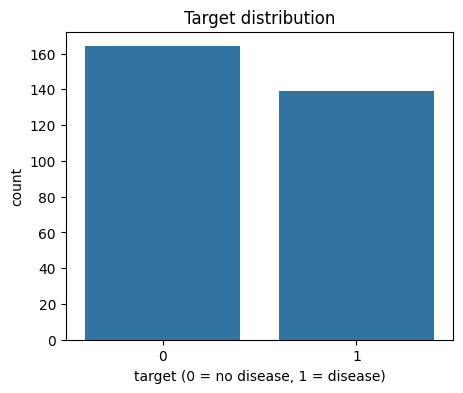

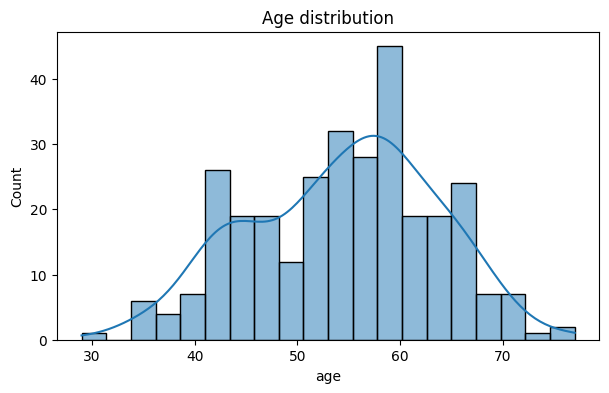

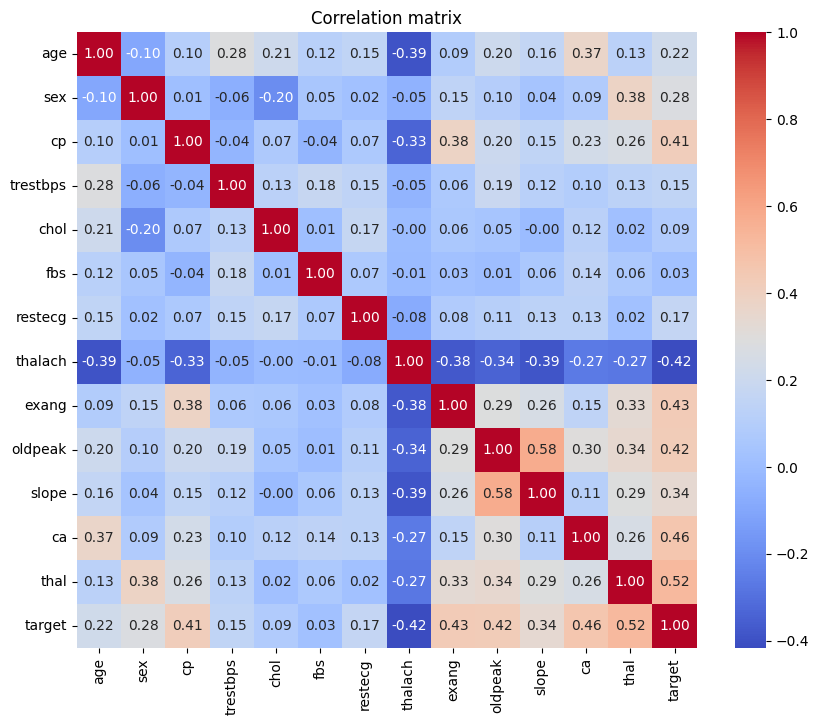


Sample rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
# ===== Step 1: Data Preprocessing & Cleaning =====
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

plt.style.use('default')

# Paths and source
local_path = "/content/heart+disease.zip.csv"
clean_path = "heart_disease_clean.csv"
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age","sex","cp","trestbps","chol","fbs","restecg",
           "thalach","exang","oldpeak","slope","ca","thal","target"]

# 1) Load dataset (use local if present, else download)
if os.path.exists(local_path):
    df = pd.read_csv(local_path)
    # if local file has no header, try reading with names
    if 'target' not in df.columns:
        df = pd.read_csv(local_path, names=columns)
else:
    df = pd.read_csv(url, names=columns)
    df.to_csv(local_path, index=False)
print("🔽 Initial shape:", df.shape)

# 2) Normalize missing-value tokens and convert to numeric where possible
df = df.replace("?", np.nan)

for col in columns:
    if col != 'target':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# 3) Make target binary: 0 -> no disease, 1 -> disease (original uses 0 = no, 1-4 = disease)
df['target'] = pd.to_numeric(df['target'], errors='coerce')
df['target'] = df['target'].apply(lambda x: 1 if (pd.notnull(x) and x > 0) else (0 if pd.notnull(x) else np.nan))

# 4) Define categorical vs numeric (for this dataset many coded ints are categorical)
categorical_cols = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
numeric_cols = [c for c in df.columns if c not in categorical_cols + ['target']]

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

# 5) Impute numeric with median
num_imputer = SimpleImputer(strategy='median')
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

# 6) Impute categorical with most frequent
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

# 7) Drop rows with missing target (if any)
missing_target = df['target'].isnull().sum()
if missing_target > 0:
    print(f"⚠️ Rows with missing target: {missing_target} — dropping these rows")
    df = df.dropna(subset=['target']).reset_index(drop=True)

# Final quick checks
print("\n✅ After imputation / cleaning — shape:", df.shape)
print(df.isnull().sum())

# Save cleaned CSV
df.to_csv(clean_path, index=False)
print(f"\n💾 Cleaned data saved to: {clean_path}")

# ===== Quick EDA plots (run in notebook to view) =====
# 1) Target distribution
plt.figure(figsize=(5,4))
sns.countplot(x='target', data=df)
plt.xlabel('target (0 = no disease, 1 = disease)')
plt.title('Target distribution')
plt.show()

# 2) Age distribution
plt.figure(figsize=(7,4))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age distribution')
plt.show()

# 3) Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

# Print head to inspect
print("\nSample rows:")
display(df.head())
